**ROSSI Sophie**

Groupe: MAHE Maxence, ROSSI Sophie

# <div align ="center"> Projet de DATA </div>
# <div align = "center"> Prédiction du risque de défaut de paiement sur un crédit </div>


<h1>Contenus<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexte" data-toc-modified-id="Contexte-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexte</a></span></li><li><span><a href="#Prétraitement" data-toc-modified-id="Prétraitement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prétraitement</a></span><ul class="toc-item"><li><span><a href="#Premier-prétraitement:-one-hot-et-power-transform" data-toc-modified-id="Premier-prétraitement:-one-hot-et-power-transform-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Premier prétraitement: <em>one-hot</em> et <em>power transform</em></a></span></li><li><span><a href="#Deuxième-prétraitement:-analyse-en-composantes-principales-(ACP)" data-toc-modified-id="Deuxième-prétraitement:-analyse-en-composantes-principales-(ACP)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Deuxième prétraitement: <em>analyse en composantes principales (ACP)</em></a></span></li></ul></li><li><span><a href="#Plus-proches-voisins" data-toc-modified-id="Plus-proches-voisins-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plus proches voisins</a></span><ul class="toc-item"><li><span><a href="#Questions-théoriques" data-toc-modified-id="Questions-théoriques-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Questions théoriques</a></span></li><li><span><a href="#Mise-en-forme-des-3-prétraitements" data-toc-modified-id="Mise-en-forme-des-3-prétraitements-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mise en forme des 3 prétraitements</a></span></li><li><span><a href="#Implémentation-des-5-plus-proches-voisins-et-évaluation-des-performances" data-toc-modified-id="Implémentation-des-5-plus-proches-voisins-et-évaluation-des-performances-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Implémentation des 5 plus proches voisins et évaluation des performances</a></span></li></ul></li><li><span><a href="#Sélection-de-modèle" data-toc-modified-id="Sélection-de-modèle-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sélection de modèle</a></span><ul class="toc-item"><li><span><a href="#Algorithme-kNN" data-toc-modified-id="Algorithme-kNN-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithme kNN</a></span></li><li><span><a href="#Régression-logistique" data-toc-modified-id="Régression-logistique-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Régression logistique</a></span></li><li><span><a href="#Sélection-du-modèle-final" data-toc-modified-id="Sélection-du-modèle-final-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sélection du modèle final</a></span></li></ul></li><li><span><a href="#Prédictions-finales" data-toc-modified-id="Prédictions-finales-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Prédictions finales</a></span></li><li><span><a href="#Apprentissage-profond" data-toc-modified-id="Apprentissage-profond-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Apprentissage profond</a></span></li></ul></div>

In [1]:
import os
from IPython.display import Image
import pandas as pd

# insérer le bon path
os.chdir("/Users/sophierossi/Desktop/rossi_projet_data/images")

## Contexte

#### <font style="color:#4D1AFB"> Utilité et risques de la prévision dans le secteur bancaire </font>

Aujourd'hui, les prévisions permises par l'intelligence artificielle s'étendent à tous les domaines, du sport, à la finance, aux assureurs et bien sur au domaine des crédits bancaires. La crise des subprimes a créé une peur des banques à preter de l'argent facilement, surtout dans une conjoncture de taux bas comme actuellement. Il parait donc judicieux pour une banque de savoir à l'avance la tendance d'un futur client à connaitre des défauts de paiements. Si les données sont proches de la réalité, une banque a tout **intérêt à utiliser ces prédictions**. 

On peut voir ce problème de classification (oui ou non il y aura un défaut de paiement) comme un test statistique d'hypothèse nulle: "il y a défaut de paiement". Il faut alors faire attention car les erreurs de première espèce (penser qu'il n'y a pas de défaut de paiement alors qu'il y en a) sont domageables pour les banques. Et d'autre part, les erreurs de deuxième espèce (penser qu'il y a défaut de paiement alors qu'il n'y en a pas) sont au détriment des clients potentiels se voyant refuser un pret alors qu'ils l'auraient remboursé dans les temps, mais aussi de la banque car elle perdrait un bon client.

Comme l'algorithme est créé pour la banque, et que celle-ci veut **limiter le risque de perdre de l'argent**, l'erreur la plus dangereuse est celle de première espèce (qui correspondra aux **faux négatifs** dans notre problème étiqueté). En effet, comme la demande de prets est très importante, refuser un pret à quelqu'un qui aurait pu le payer n'est pas dramatique. Toutefois, il faut que le modèle reste suffisamment bon pour éviter une erreur de deuxième espèce trop fréquente.

Cependant, déployer un tel modèle pose de nombreuses **questions éthiques** tout comme les modèles de prédiction dans l'assurance. Si on se base uniquement sur ces renseignements, certaines personnes ne pourront jamais obtenir le bénéfice du doute et avoir un prêt. Déployer ce modèle à grande échelle signifie aussi essayer de le rendre toujours plus performant, en intégrant de plus en plus de variables pour décrire un client, comme par exemple des données privées telles que la **santé** de la personne et de sa famille. Ainsi, des individues pourraient ne pas se voir attribuer un pret parce que l'algorithme a pu constater un gros risque cardiaque du aux antécédents médicaux. C'est par exemple ce type de système (pas forcément implémenté à travers le prisme du machine learning) qui régit le système d'assurances maladies aux Etats-Unis: c'est une **philosophie totalement reniée et critiquée en Europe**.

D'autre part, les modèles de prédictions dans l'industrie bancaire sont aussi utilisés à des **fins marketing** afin de cibler des potentiels clients grâce à leur historique internet ou leur profession par exemple. Mais aussi dans la **fraude à l'assurrance** ou même dans la **prédiction de criminalité**! (source: https://www.cgi.com/sites/default/files/pdf/analyse-predictive.pdf)


#### <font style="color:#4D1AFB"> Point de vue technique et écueils potentiels de l'implémentation </font>
D'un point de vue plus technique, nous faisons face à:
+ un **problème d'apprentissage supervisé** (ou prédictif) car on dispose d'une liste d'exemples étiquetés (*ie* le fichier csv)
+ avec **23 variables (*features*) d'intéret**
+ dont les **étiquettes** correspondent à si oui ou non il y a un **défaut de paiement** 
    * défaut de paiement (étiquette: 1)
    * pas de défaut de paiement (étiquette: 0)

On veut donc réussir à prédire s'il y aura un défaut de paiement ou pas à partir de toutes les autres features.

Tout d'abord, les algorithmes d’apprentissage supervisé ont de meilleures performances sur un faible nombre de variables car la prise en compte de variables peu pertinentes peut amener à un biais considérable. Il faut donc faire attention au **fléau de la dimension**, surtout lors des prétraitements que l'on sera amené à mettre en place. On essaiera de limiter le fléau de la dimension en faisant une analyse en composantes principales en partie 2.

De plus, intégrer par la suite un plus grand nombre de *features* pourrait rendre l'algorithme d'apprentissage supervisé moins performant, et la banque serait amenée à changer radicalement de modèle. La possibilité de mettre en place de l'apprentissage profond sera discuté en partie 6.

D'autre part, on va entrainer le modèle prédictif sur les données de la banque elle-meme, ce qui peut entrainer des **biais systématiques** si les données ne sont pas de bonne qualité ou **peu représentatives de la situation réelle des clients**. La **reproduction de biais** est donc aussi un enjeu majeur, que l'algorithme d'apprentissage ne peut en aucun cas résoudre par lui-meme puisqu'il est totalement dépendant des données sur lesquelles il est entrainé.

On peut aussi penser à la **robustesse** de l'algorithme comme enjeu majeur: il faut que l'algorithme soit suffisamment robuste pour éviter que quelques données mal étiquetées ne l'induisent en erreur. Et, d'autre part, si la banque décide de changer de procédure et de critères dans l'affectation d'un pret à ses clients, l'algorithme créé ne sera presque plus d'aucune utilité. En effet, il faudrait alors non seulement un nouveau modèle (qui peut s'inspirer du précédent) mais aussi de nouvelles données (et en grandes quantités).


## Prétraitement

### Premier prétraitement: *one-hot* et *power transform*

On dispose de:
+ 9 variables **catégorielles**: Sexe, Education, Age, Statut_mois_1, ..., Statut_mois_6
+ 1 variable **discrète**: Age
+ 13 variables **continues**: Credit_total, Montant_mois_1, ..., Montant_mois_6, Versement_mois_1, ..., Versement_mois_6
+ 1 **étiquette**: Defaut_de_paiement

Les variables continues sont homogènes entre elles (prix) mais pas avec la variable discrète.
De plus, les **variables continues ont une grande amplitude**: il faut donc chercher à la réduire. Pour cela, plusieurs méthodes existent, dont notamment le *minmax scaling* et la *standardisation*. On va alors utiliser celle qui semble la plus pertinente par rapport le problème que l'on traite:

+ Le *minmax scaling* ramène les données sur l'ensemble [0,1] ce qui a pour avantage d'**éliminer les valeurs aberrantes (*outliers*)**. 
+ Or, plusieurs algorithmes requièrent que les **données soient centrées**: c'est notamment le cas pour l'algorithme d'**ACP** de la section suivante. Dans ce cas la *standardisation* est plus appropriée.

Ainsi, je vais plutot "standardiser" les variables continues. Mieux encore, comme par la suite on va utiliser la **méthode ACP qui se fonde sur la variance**, on aimerait que celle-ci soit **stable**. C'est ce que font les ***power transform***: il s'agit de transformations de données utilisées pour stabiliser la variance et pour rendre la distribution de la variable plus proche d'une distribution gaussienne. 
 
Les *power transform* ont aussi pour avantage d'**améliorer le coefficient de corrélation de Pearson** entre plusieurs variables. Or, des variables plus corrélées vont partager "plus d'informations", ce qui permet de réduire le nombre de composantes principales sur lesquelles projeter les données lors de l'ACP.

J'applique également une *power transform* à la variable discrète afin d'éviter des problèmes de dimension et de dispersion.

Ainsi, j'effectue en un premier temps le prétraitement suivant: 
+ **encodage one-hot sur les variables catégorielles**
+ **Yeo-Johnson appliqué aux variables continues et à la variable discrète**


#### Stratification
Tout d'abord, on commence par stratifier les données.

On partitionne la population en 2 strates :
+ les individus qui sont en défaut de paiement : il y en a 1011
+ les individus qui ne le sont pas: il y en a 3480

En effet, le but de notre problème est de réussir, avec un jeu de données `X` contenant les 23 *features* d'intéret, à prédire si oui ou non, pour chaque individu, il va y avoir un défaut de paiement. Or, on voit bien que pour des données réelles, il y a (heureusement!) bien moins de gens qui sont en défaut de paiement que ceux qui ne le sont pas.

Ainsi, on voudrait un **échantillon représentatif de la population par rapport à la variable étiquetée**. Donc, d'après ce qui précède, tirer aléatoirement des individus avec une probabilité discrète uniforme perd de son sens et de son utilité. C'est pourquoi il est nécessaire de partitionner la population en 2 catégories, et de procéder à un échantillonnage aléatoire dans chacune. Ainsi, les proportions de gens en défaut de paiement et gens non en défaut de paiement sont maintenues dans l'échantillon et donc les prévisions successives ne seront pas biaisées de ce point de vue.

Enfin, on construit un jeu `X_train` pour entrainer les données, et un jeu `X_test` pour les tester par la suite.

#### Visualisation des données avant et après prétraitement

Les variables continues et quantitatives (Credit_total, Montant_mois_i, Versement_mois_i) peuvent etre représentées par des histogrammes, les variables catégorielles qualitatives (Sexe, Education, Statut_marital, Statut_mois_i) par des diagrammes en batons, et la variable discrète quantitative par un histogramme également.

On visualise les données du jeu d'entrainement.

#####  <font style="color:#4D1AFB"> Histogrammes des variables quantitatives </font>

+ Crédit total:

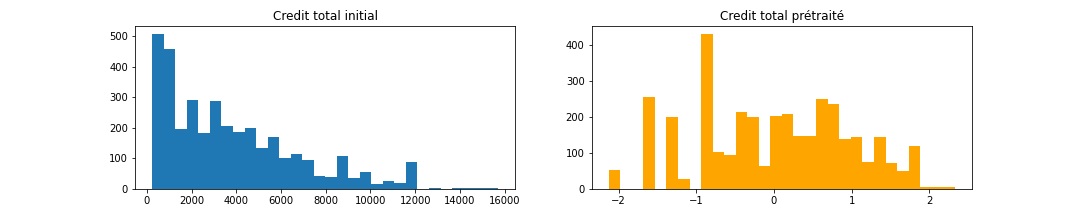

In [2]:
Image(filename='visualisation_credit_tot_pretraite.png')

+ Age

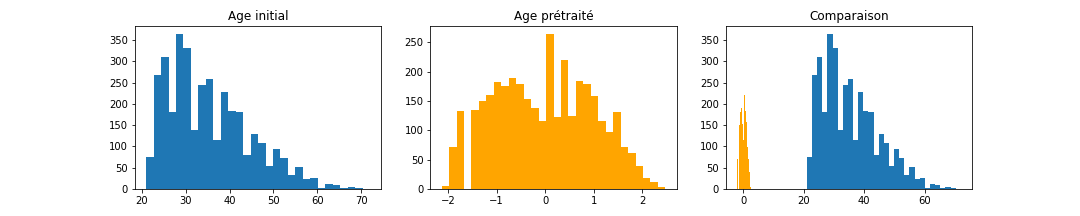

In [3]:
Image(filename='visualisation_age_pretraite.png')

+ Montant dû à chacun des 6 mois précédents: 

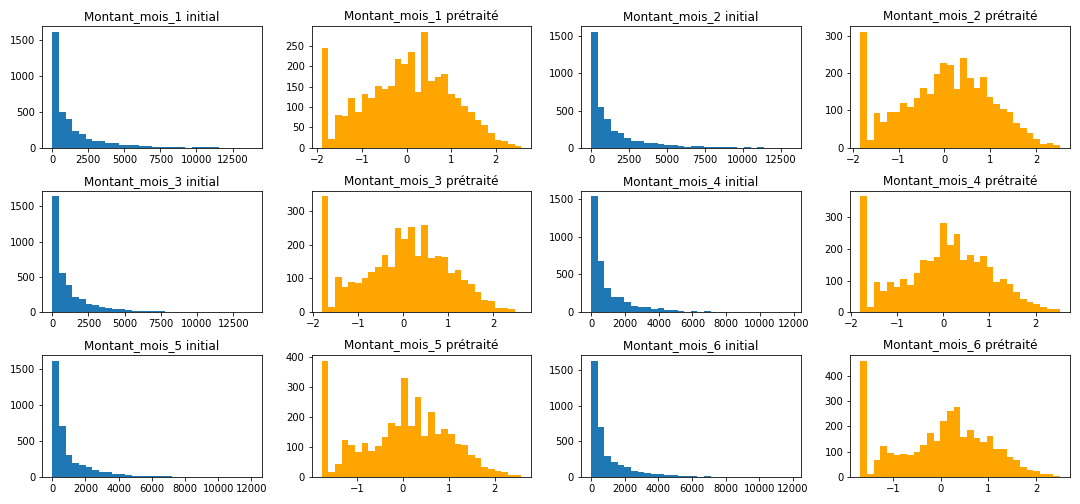

In [4]:
Image(filename='visualisation_montant_mois_pretraite.png')

+ Montant versé à chacun des 6 mois précédents:

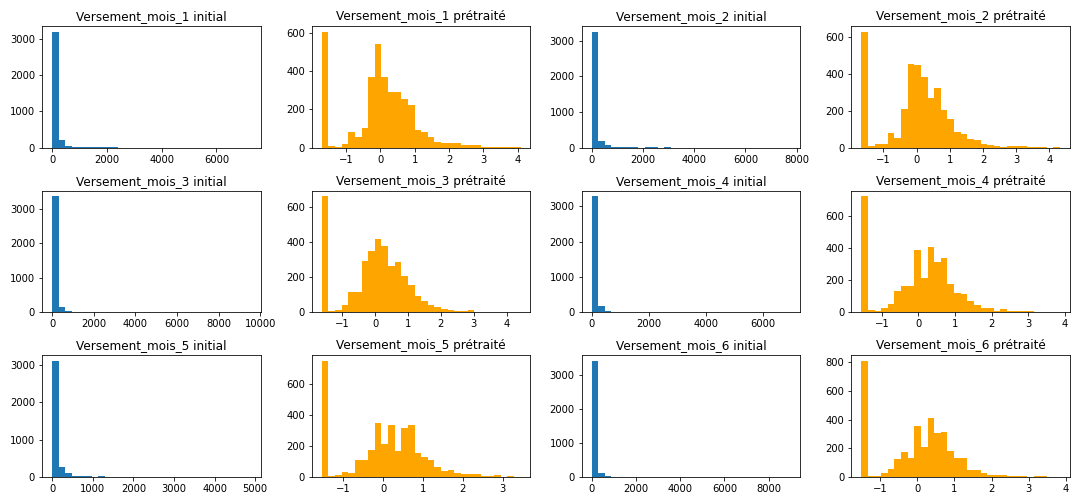

In [5]:
Image(filename='visualisation_versement_mois_pretraite.png')

##### <font style="color:#4D1AFB"> Diagrammes en batons des variables catégorielles </font>


+ Sexe

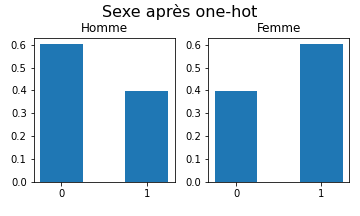

In [6]:
Image(filename = "visualisation_sexe_dummies.png")

+ Education

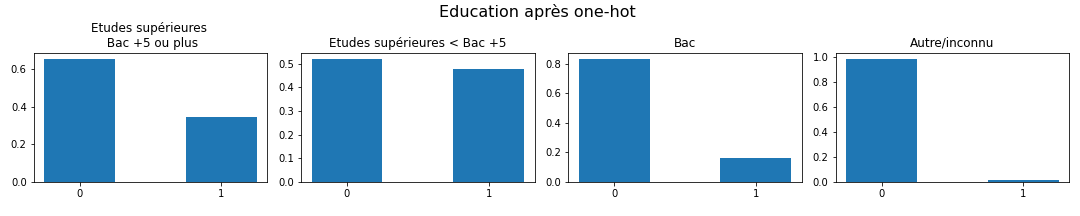

In [7]:
Image(filename = "visualisation_education_dummies.png")

+ Statut Marital

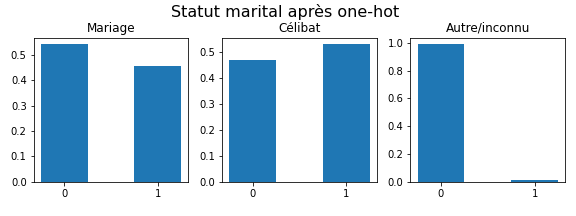

In [8]:
Image(filename = "visualisation_statut_marital_dummies.png")

Pour une visualisation moins lourde des statuts aux mois précédents, je n'ai mis que 3 graphiques sur les 6. Les autres se trouvent dans le fichier "images".

<ins> NB </ins>: S'il manque une ou plusieurs colonnes c'est parce que l'étiquette y est toujours positive, et donc la colonne correspondante n'a pas été créé. Ainsi, meme si à l'oeil nu il semble inexistant, aucun *baton* n'est nul.  

+ Statut au mois précédent

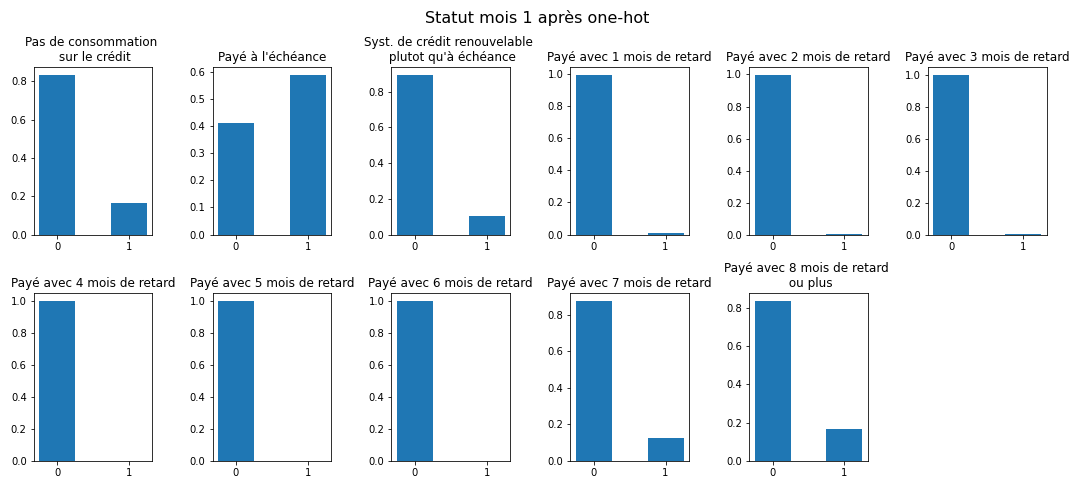

In [9]:
Image(filename = "visualisation_statut_mois_1_dummies.png")

+ Statut aux 3 mois précédents

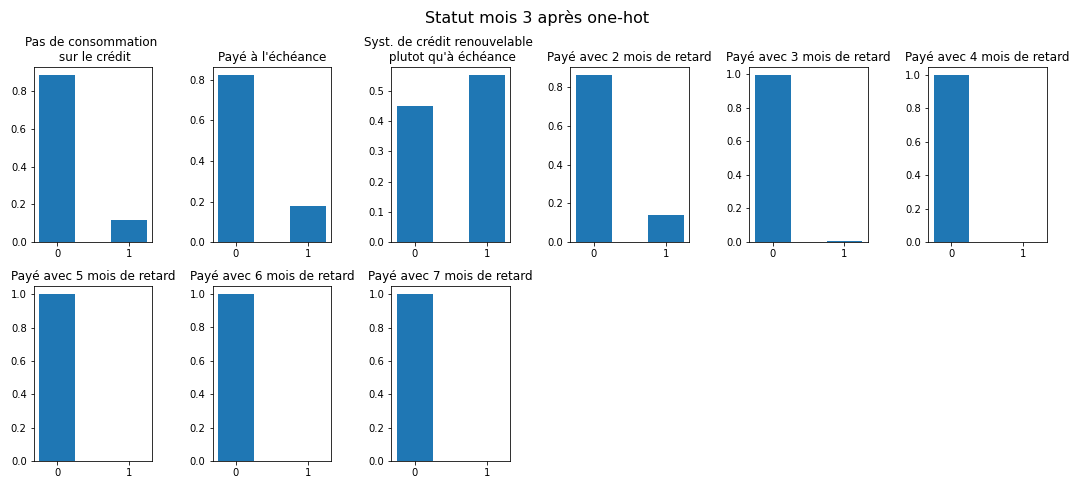

In [10]:
Image(filename = "visualisation_statut_mois_3_dummies.png")

+ Statut aux 6 mois précédents

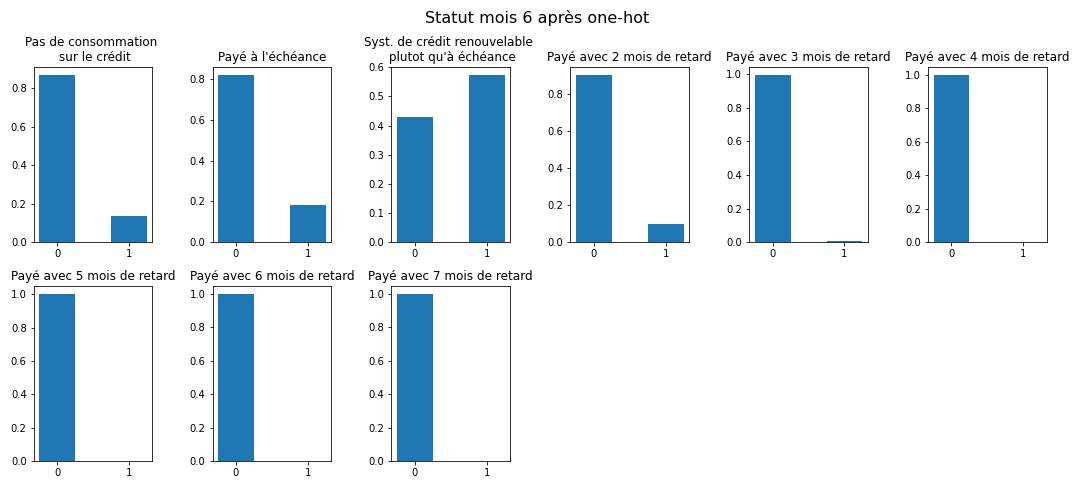

In [11]:
Image(filename = "visualisation_statut_mois_6_dummies.png")

### Deuxième prétraitement: *analyse en composantes principales (ACP)*

L'analyse en composantes principales (**ACP**) est une méthode de prétraitement qui permet de **réduire considérablement la dimension des données** en les projetant sur leurs composantes principales, sans pour autant perdre beaucoup d'informations. Je fixe pour **seuil 95%**: les composantes expliquent ensemble un pourcentage (pris à 95%) de la variance. En ce sens, le vecteur obtenu reste informatif.

Afin d'appliquer l'ACP, il faut tout **d'abord restandardiser les variables**. J'applique l'ACP aux données brutes.

Ci-dessous, je présente également les résultats obtenus lorsque l'on applique l'ACP aux données issues du premier prétraitement.

#####  <font style="color:#4D1AFB"> ACP avant prétraitement </font>

On trouve les résultats suivants: 
+ La proportion de variance expliquée par les 2 premières composantes est de: 0.47
+ Pour etre informatif, le modèle doit avoir **15 composantes principales**, ce qui correspond à 96.035 % de la variance expliquée

Ci-dessous se trouvent les courbes de proportion de variance expliquée et de proportion cumulative de variance expliquée en fonction des composantes principales. C'est sur la deuxième que l'on peut visualiser à partir de combien de composantes principales 95% de la variance est expliquée (droite d'ordonnée 0.95 en rouge). 

De plus, comme on avait 23 variables d'intéret au départ et qu'on se retrouve plus qu'avec 15 composantes principales, **on a bien réduit la dimension du problème** et a priori sa complexité également.

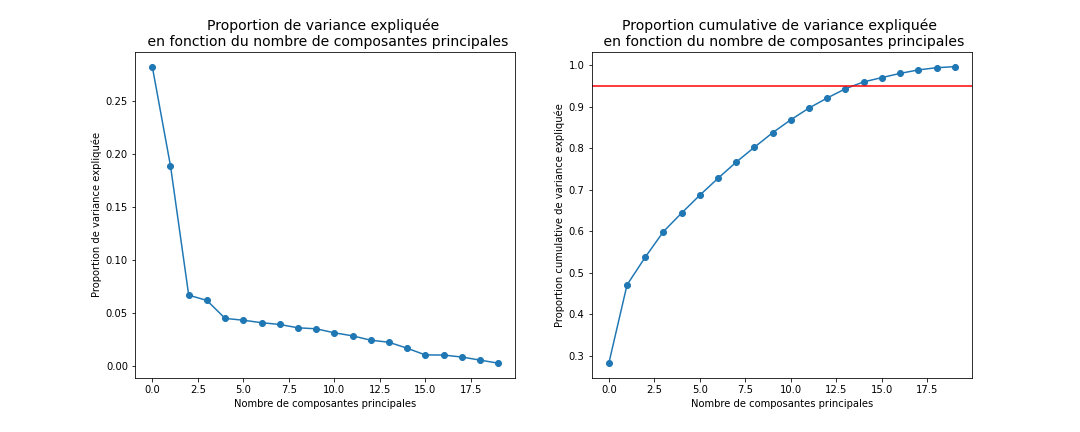

In [12]:
Image(filename = "courbes_ACP_donnees_brutes.png")

Voici ci-dessous quelques représentations des données selon les composantes principales.

On remarque que les points bleus (défaut de paiement) et rouges (pas de défaut de paiement) sont **très mélangés** et donc il ne semble pas y avoir de direction principale privilégiée. La classification s'annonce diffile.

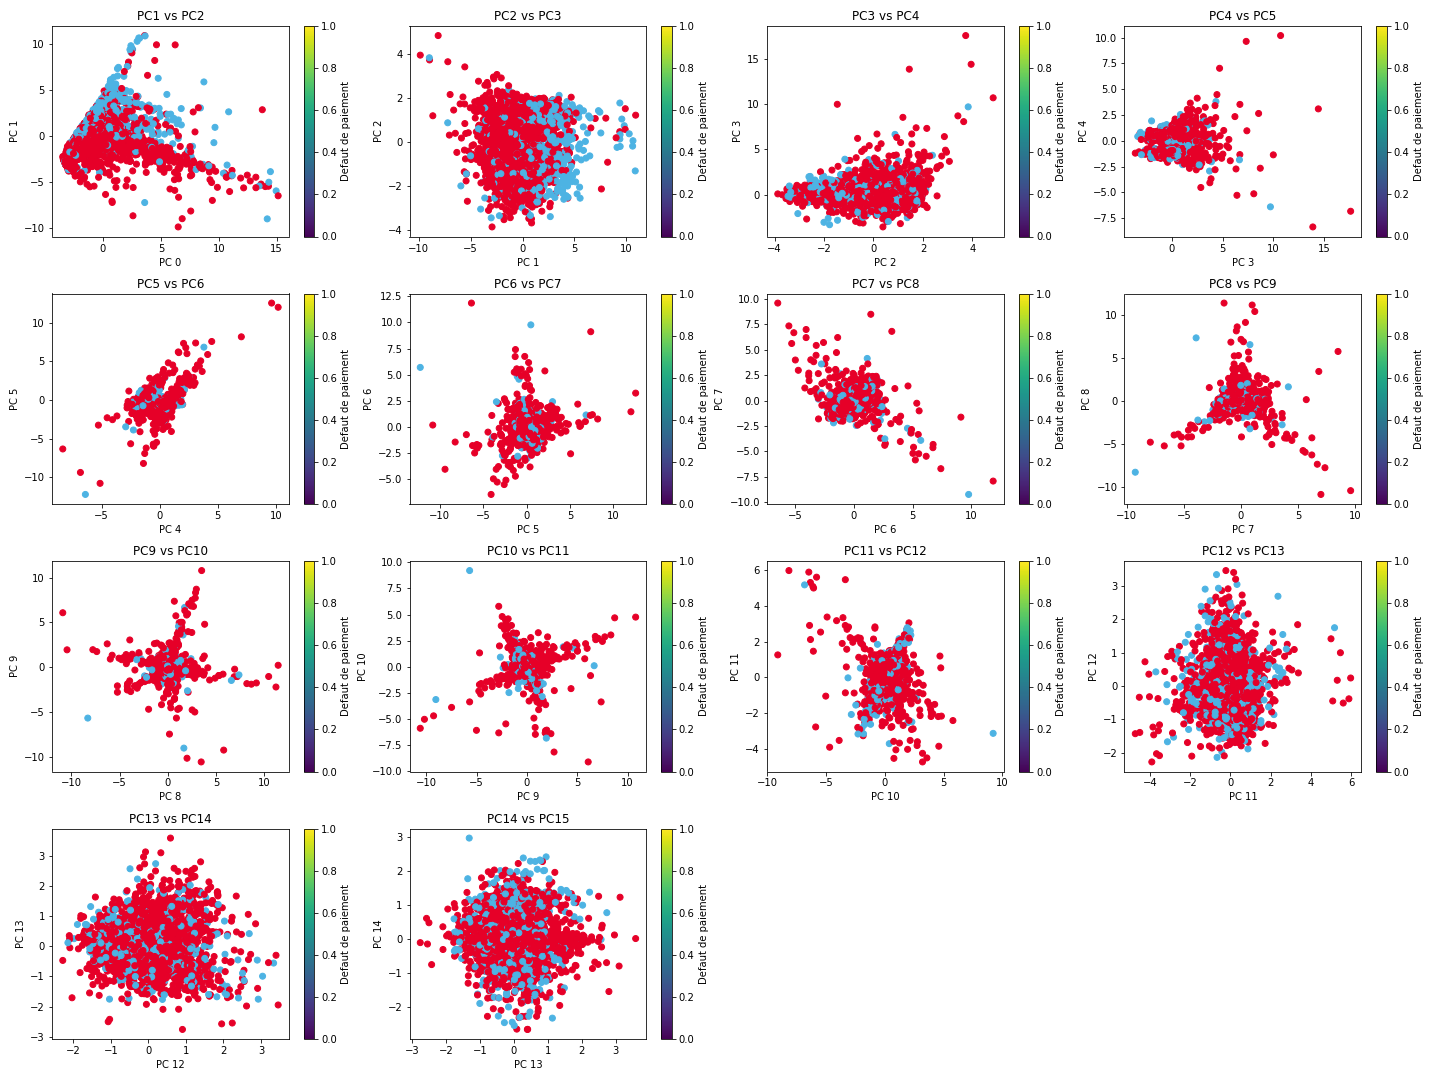

In [13]:
Image(filename = "ACP_scatter_plots_donnees_brutes.png")

#####  <font style="color:#4D1AFB"> ACP après prétraitement </font>

Lorsque l'on applique l'ACP au vecteur `X_train_1` (obtenu après le premier prétraitement), on obtient des résultats à l'apparence moins bons que lorsqu'on applique l'ACP aux données brutes. Il faut désormais 20 composantes principales pour expliquer 95% de la variance. 

Le nombre de composantes principales a augmenté, mais cela s'explique en partie par le fait que l'encodage one-hot ajoute un très grand nombre de colonnes. Le vecteur `X_train_1` a 80 colonnes. Ainsi, ne projeter plus que sur 20 colonnes réduit considérablement la dimension du problème.

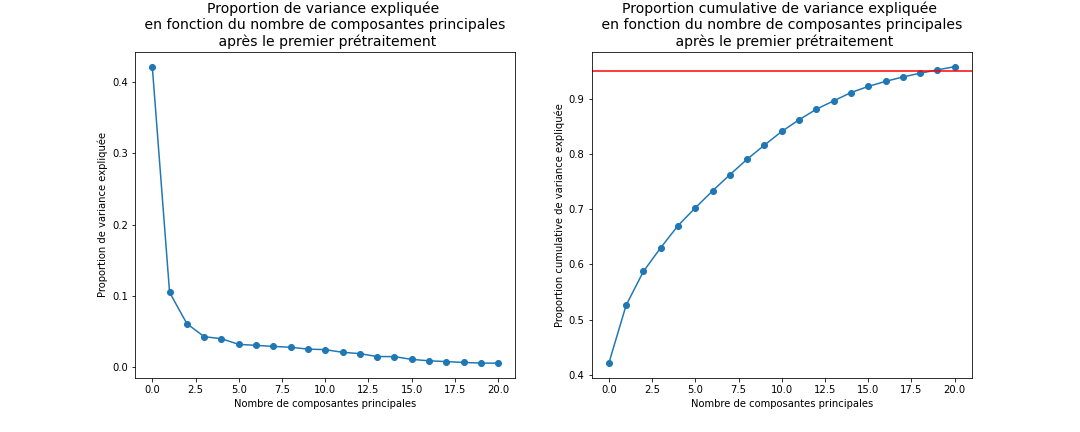

In [14]:
Image(filename = "courbes_ACP_donnees_pretraitees.png")

#### Récapitulatif:

J'ai donc effectué 3 prétraitements possibles des données:
1. prétraitement 1: one-hot pour les variables catégorielles et yeo-johnson pour les autres variables (quantitatives) $\rightarrow$ on obtient `X_train_1`, `X_test_1`
2. prétraitement 2: ACP sur les données brutes $\rightarrow$ on obtient `X_train_2`, `X_test_2`
3. prétraitement 3: ACP sur les données prétraitées avec le prétraitement 1 $\rightarrow$ on obtient `X_train_3`, `X_test_3`

Je garderai ces notations dans toute la suite du rapport.

Je vais évaluer dans la section suivante les performances de ces prétraitements afin de choisir le plus efficace et le mieux adapté à notre problème de classification


## Plus proches voisins

### Questions théoriques

<font color = green> L’algorithme du plus proche voisin (kNN avec k=1) prédit l’étiquette d’une observation comme celle de son point le plus proche dans le jeu d’entraînement.
    
— Quelle est la classe des hypothèses?

— S’agit-il d’un modèle paramétrique ou non?

— Peut-on écrire cet algorithme sous la forme de la minimisation d’unrisque empirique? Si oui,précisez la classe des hypothèses, la fonction de coût et la technique d’optimisation utilisée. Remarque : le point le plus proche d’un point du jeu d’entraînement est lui-même. </font>


L’algorithme du plus proche voisin (kNN avec k=1) prédit l’étiquette d’une observation comme celle de son point le plus proche dans le jeu d’entraînement.

+ Classe des hypothèses correspond à l'ensemble des fonctions qui pour chaque instance à prédire lui associe la classe de l'instance "d'entrainement" la plus proche, en termes de distance euclidienne

+ L'algorithme du plus proche voisin n'est pas un modèle paramétrique car on ne sait pas écrire la fonction de décision comme une fonction des variables prédictives

+ Oui

### Mise en forme des 3 prétraitements

In [15]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, PowerTransformer

In [16]:
# Extraction des données

os.chdir("/Users/sophierossi/Desktop/rossi_projet_data/csv_files")
df_public = pd.read_csv('credit_public.csv', sep='\t')
y = df_public["Defaut_de_paiement"]
y_public = y.values
columns = list(df_public.columns)
columns.pop()
X = df_public[columns]
X_public = X.values

X_train, X_test, y_train, y_test = train_test_split(X_public, y_public, test_size=0.20, random_state=92)

In [17]:
# prétraitement 1

# encodage one-hot sur les variables catégorielles
features = list(df_public.drop(columns=["Defaut_de_paiement"]).columns)
c_features = ["Sexe", "Education", "Statut_marital", "Statut_mois_1", "Statut_mois_2", "Statut_mois_3",
              "Statut_mois_4", "Statut_mois_5", "Statut_mois_6"]
c_features_idx = [features.index(feat_name) for feat_name in c_features]

dummy_encoder = OneHotEncoder(categories = "auto", sparse=False, handle_unknown = "ignore") # categories pas trop pratique mais mieux que rien

dummy_encoder.fit(X_train[:, c_features_idx])
X_train_onehot = dummy_encoder.transform(X_train[:, c_features_idx])
X_test_onehot = dummy_encoder.transform(X_test[:, c_features_idx])

# encodage yeo-johnson sur les variables quantitatives
yeo_features = ["Credit_total", "Age", "Montant_mois_1", "Montant_mois_2", "Montant_mois_3", "Montant_mois_4", 
                       "Montant_mois_5", "Montant_mois_6", "Versement_mois_1", "Versement_mois_2", "Versement_mois_3",
                       "Versement_mois_4", "Versement_mois_5", "Versement_mois_6"]
yeo_features_idx = [features.index(feat_name) for feat_name in yeo_features]
boxcox_scaler = PowerTransformer(method='yeo-johnson')
boxcox_scaler.fit(X_train[:,yeo_features_idx])

X_train_yeo = boxcox_scaler.transform(X_train[:, yeo_features_idx])
X_test_yeo = boxcox_scaler.transform(X_test[:, yeo_features_idx])


# entrainement 
X_train_1 = np.hstack((X_train_yeo, X_train_onehot))

# test
X_test_1 = np.hstack((X_test_yeo, X_test_onehot))

In [18]:
# ACP

def preprocess_2_acp(X_train, X_test, n):
    std_scale = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = std_scale.transform(X_train)
    X_test_scaled = std_scale.transform(X_test)
    pca = decomposition.PCA(n_components = n)
    pca.fit(X_train_scaled)
    X_train_projected = pca.transform(X_train_scaled)
    X_test_projected = pca.transform(X_test_scaled)
    return X_train_projected, X_test_projected

In [19]:
# prétraitement 2
X_train_2, X_test_2 = preprocess_2_acp(X_train_1, X_test_1, 15)

# prétraitement 3
X_train_3, X_test_3 = preprocess_2_acp(X_train_1, X_test_1, 20)

### Implémentation des 5 plus proches voisins et évaluation des performances

J'ai effectué des prédictions à l'aide de l'algorithme des **5 plus proches voisins**, et il faut maintenant **déterminer quel est le meilleur prétraitement**. 

Le premier critère de performance que l'on peut regarder est le **taux d'erreur** (1 - *accuracy score*), c'est à dire le nombre de mauvaises prédictions sur le nombre total de prévisions.

Néanmoins, ce n'est pas toujours le meilleur critère permettant d'évaluer un modèle: d'autres scores peuvent etre pris en compte tels que le rappel, le f-score ou la précision.


Le **rappel (*recall score*)**, défini par, $ \frac{\text{vrais positifs}}{\text{vrais positifs + faux négatifs}} $ est bien adapté à notre problème car il y a un grand enjeu lié aux faux négatifs. En effet, les étiquettes négatives correspondent au fait qu'il n'y ait pas eu de défaut de paiement. Ainsi, il est grave de penser qu'il y n'y a pas eu de défaut de paiement alors qu'il y en a eu!

D'autre part, le **F-score** permet de quantifier l'équilibre entre précision et rappel, et est utilisé lorsqu'il y a une disproportion importante entre les positifs et négatifs réels. C'est bien notre cas ici: il y a beaucoup plus de personnes qui remboursent leur pret que personnes qui sont en défaut de paiement. 

Enfin, on peut regarder les **valeurs prises par la fonction de décision** qui  associe à un point la proportion de ses 5 plus proches voisins qui sont positifs (0, 1/6, 2/6, ..., 1). C'est en seuillant cette fonction que sont déterminées les prédictions 0 ou 1. Les valeurs de la fonction de décision sont représentées dans les boites à moustache ci-dessous.

In [20]:
from sklearn.metrics import f1_score
from sklearn import neighbors
from sklearn.metrics import recall_score, accuracy_score

In [21]:
neigh = neighbors.KNeighborsClassifier(n_neighbors = 5)

# sans prétraitement
neigh.fit(X_train, y_train)
y_pred_5nn = neigh.predict(X_test)
scores_5nn = neigh.predict_proba(X_test)

# prétraitement 1
neigh.fit(X_train_1, y_train)
y_pred_5nn_1 = neigh.predict(X_test_1)
scores_5nn_1 = neigh.predict_proba(X_test_1)


# prétraitement 2
neigh.fit(X_train_2, y_train)
y_pred_5nn_2 = neigh.predict(X_test_2)
scores_5nn_2 = neigh.predict_proba(X_test_2)

# prétraitement 3
neigh.fit(X_train_3, y_train)
y_pred_5nn_3 = neigh.predict(X_test_3)
scores_5nn_3 = neigh.predict_proba(X_test_3)

In [22]:
index = ["Avant prétraitement", "Pretraitement 1", "Pretraitement 2", "Pretraitement 3"]
names = ["Accuracy", "Recall", "F-score"]
l = []

l.append([round(accuracy_score(y_test, y_pred_5nn), 3), round(recall_score(y_test, y_pred_5nn), 3), round(f1_score(y_test, y_pred_5nn), 3)])
l.append([round(accuracy_score(y_test, y_pred_5nn_1), 3), round(recall_score(y_test, y_pred_5nn_1), 3), round(f1_score(y_test, y_pred_5nn_1), 3)])
l.append([round(accuracy_score(y_test, y_pred_5nn_2), 3), round(recall_score(y_test, y_pred_5nn_2), 3), round(f1_score(y_test, y_pred_5nn_2), 3)])
l.append([round(accuracy_score(y_test, y_pred_5nn_3), 3), round(recall_score(y_test, y_pred_5nn_3), 3), round(f1_score(y_test, y_pred_5nn_3), 3)])


df_5nn = pd.DataFrame(l, index = index, columns = names) 
path_sophie = "/Users/sophierossi/Desktop/rossi_projet_data/csv_files"
os.chdir(path_sophie)
df_5nn.to_csv("5nn.csv")
df_5nn

,Accuracy,Recall,F-score
Avant prétraitement,0.745,0.151,0.196
Pretraitement 1,0.795,0.328,0.399
Pretraitement 2,0.788,0.349,0.405
Pretraitement 3,0.788,0.333,0.394


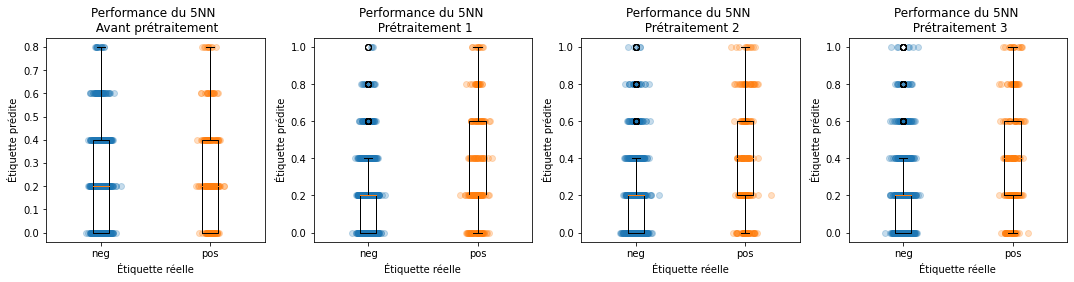

In [23]:
def boite_moustache(y_test, scores, name):
    y_test_pos_idx = np.where(y_test==1)[0]
    y_test_neg_idx = np.where(y_test==0)[0]

    scores_neg = scores[y_test_neg_idx, 1]
    scores_pos = scores[y_test_pos_idx, 1]
    b = plt.boxplot([scores_neg, scores_pos])

    plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
    plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

    plt.xticks([1, 2], ['neg', 'pos'])
    plt.xlabel('Étiquette réelle')
    plt.ylabel('Étiquette prédite')
    plt.title(f"Performance du 5NN \n {name}")

fig = plt.figure(figsize = (15, 4))
plt.subplot(1, 4, 1)
boite_moustache(y_test, scores_5nn, "Avant prétraitement")
plt.subplot(1, 4, 2)
boite_moustache(y_test, scores_5nn_1, "Prétraitement 1")
plt.subplot(1, 4, 3)
boite_moustache(y_test, scores_5nn_2, "Prétraitement 2")
plt.subplot(1, 4, 4)
boite_moustache(y_test, scores_5nn_3, "Prétraitement 3")
fig.tight_layout(pad=1.0)

#### Interprétation

A partir du tableau, on peut voir que le prétraitement 3, pour les 5 plus proches voisinfs, présente les pires scores par rapport aux deux autres prétraitements. Le prétraitement 2 a un faible taux d'erreurs, le meilleur F-score et le meilleur rappel, alors que le prétraitement 1 a le plus faible taux d'erreurs. Or, comme on l'a dit précédemment, ce sont particulièrement le F-score et le rappel qui vont quantifier si le modèle choisi est performant (pour notre problème de classification). Ainsi, c'est a priori **le prétraitement 2 que l'on choisit pour les 5 plus proches voisins**.

On remarque également que les **scores des données brutes sont nettement moins bons que ceux des prétraitements**, ce qui prouve que ces derniers ont été efficaces et possèdent un véritable intéret. 

En ce qui concerne les boites à moustache:
+ à l'exception des données brutes, les "boites" des valeurs négatives sont proches les unes des autres, avec plus de 50% des valeurs de la fonction de décision étant inférieure à 0.2.
+ les "boites" des valeurs positives sont plus larges, avec 50% des valeurs de la fonction de décision se trouvant entre 0 et 0.4 ou 0.2 et 0.6, ce qui reste tout de meme assez proche de la valeur négative.
+ il reste toutefois difficile de départager le meilleur prétraitement à partir des boites à moustache, car ces dernières sont proches les unes des autres.


#### <font style="color:#4D1AFB"> Courbes ROC </font>
On peut également évaluer les performances de ces transformations à l'aide d'une courbe ROC. 

Une courbe ROC représente le taux de faux négatifs en fonction du taux de faux positifs. Pour un classifieur binaire parfait (sensibilité et spécificité égales à 100%), la courbe longe l'axe des ordonnées et puis la droite d'équation y = 1. Pour un classifieur binaire incapable de discriminer les étiquettes positives des négatives, la courbe ROC correspond à l'identité.

In [24]:
from sklearn.metrics import roc_curve

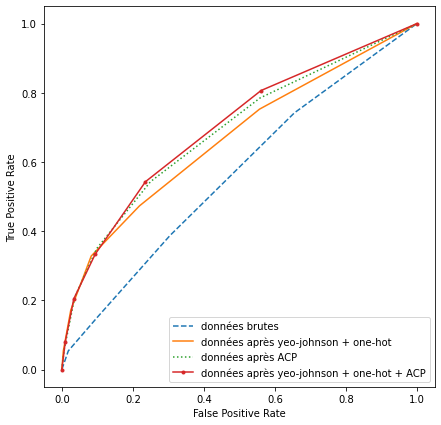

In [25]:
# roc_curve prend en argument les probability estimates of the positive class ie la 2ème colonne de y_pred_5nn_scores

# 5nn sur les données brutes
y_score = [scores_5nn[i][1] for i in range(len(scores_5nn))]
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# 5nn sur les données yeo-johnson + one-hot
y_score_1 = [scores_5nn_1[i][1] for i in range(len(scores_5nn_1))]
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score_1)

# 5nn sur les données après ACP
y_score_2 = [scores_5nn_2[i][1] for i in range(len(scores_5nn_2))]
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_2)

# 5nn sur les données après yeo-johnson + one-hot + ACP
y_score_3 = [scores_5nn_3[i][1] for i in range(len(scores_5nn_3))]
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_3)

fig = plt.figure(figsize = (7, 7))
plt.plot(fpr, tpr,linestyle='--', label='données brutes')
plt.plot(fpr_1, tpr_1, linestyle='-', label='données après yeo-johnson + one-hot')
plt.plot(fpr_2, tpr_2, linestyle="dotted", label='données après ACP')
plt.plot(fpr_3, tpr_3, marker=".", label='données après yeo-johnson + one-hot + ACP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

#### Interprétation

Les courbes ROC des différents prétraitements sont, ici aussi, bien meilleures que celle des données brutes, car elles se rapprochent plus de la courbe ROC d'un classifieur parfait. 

La courbe du prétraitement 1 se trouve (presque) toujours en-dessous de celles des deux autres, ce qui signifie que le prétraitement 1 permet d'aboutir à un moins bon modèle que les deux autres prétraitements.

Il est plus compliqué de départager les prétraitements 2 et 3 car leurs courbes sont très proches. Ceci n'est pas très surprenant car le prétraitement 3 n'est qu'une projection du prétraitement 1 sur les composantes principales (en gardant 95% de l'information).

## Sélection de modèle

<font color = green>

1. Utilisez une validation croisée sur votre jeu d’entraînement(X_train, y_train)pour sélectionner les meilleurs hyperparamètres:

— d’une approche des k plus proches voisins(hyperparamètre=valeurdek);

— d’une régression logistique régularisée. Vous pouvez justifier le choix du type de régularisation soit par des arguments a priori, soit en considérant le type de régularisation comme un hyperparamètre. Dans les deux cas, la valeur du coefficient de régularisation est à choisir par validation croisée ;

— [facultatif] d’une ou plusieurs autres approches de classification de votre choix (forêts aléatoires, SVM, etc.).
2. Ré-entraînez ces méthodes (kNN avec k optimal; régression logistique avec votre choix de régularisation et votre choix de coefficient de régularisation ; etc.) sur votre jeu d’entraînement (X_train, y_train)et appliquez les modèles ainsi appris à votre jeu de test (X_test, y_test).


Dans le rapport, incluez
— Votre code;

— Une ou plusieurs figures permettant de comparer les performances (selon la ou les mesures de performance de votre choix) des différentes approches, d’une part, en validation croisée, et d’autre part, sur votre jeu de test ;

— Une analyse statistique : les prédictions (valeurs de la fonction de décision) que vous obtenez sur le jeu de test sont-elles significativement différentes entre les différents modèles ? Une des façons de répondre à cette question consiste à utiliser un test de comparaison de deux distributions conti- nues non-indépendantes tels que le test des rangs signés de Wilcoxon, ou Wilcoxon signed-rank test, implémenté dans scipy.stats.wilcoxon. Si vous comparez plus de deux modèles, n’oubliez pas d’utiliser une correction de tests d’hypothèses multiples.

— Quelques phrases pour analyser ces résultats et en conclure quel modèle final choisir.
</font>

### Algorithme kNN

On a crée les vecteurs prétraités et que l'on gardera par la suite, notés:
+ `X_train_1` et `X_test_1` pour le prétraitement one-hot + yeo-johnson
+ `X_train_2` et `X_test_2` pour le prétraitement acp
+ `X_train_3` et `X_test_3` pour le prétraitement one-hot + yeo-johnson + acp

#### <font style="color:#4D1AFB"> Exemple de validation croisée pour les 5 plus proches voisins</font>

In [26]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV

In [27]:
# Pour les 3 prétraitements
n = 5
neigh = neighbors.KNeighborsClassifier(n_neighbors = n)

cv_results_1 = cross_validate(neigh, X_train_1, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 1: {0:0.3f}".format(np.mean(cv_results_1["test_score"])))
print("Standard deviation f-score (validation) pretraitement 1: {0:0.3f}".format(np.std(cv_results_1["test_score"])))


cv_results_2 = cross_validate(neigh, X_train_2, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) seul acp: {0:0.3f}".format(np.mean(cv_results_2["test_score"])))
print("Standard deviation f-score (validation) seul acp: {0:0.3f}".format(np.std(cv_results_2["test_score"])))

cv_results_3 = cross_validate(neigh, X_train_3, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) seul acp: {0:0.3f}".format(np.mean(cv_results_3["test_score"])))
print("Standard deviation f-score (validation) seul acp: {0:0.3f}".format(np.std(cv_results_3["test_score"])))

Average f-score (validation) pretraitement 1: 0.389
Standard deviation f-score (validation) pretraitement 1: 0.013
Average f-score (validation) seul acp: 0.436
Standard deviation f-score (validation) seul acp: 0.031
Average f-score (validation) seul acp: 0.470
Standard deviation f-score (validation) seul acp: 0.031


#### <font style="color:#4D1AFB"> Sélection du meilleur hyper-paramètre </font>

<ins> NB </ins>: Pour faire tourner la case ci-dessous sans provoquer d'erreurs (ou plutot de biais), il faut d'abord refaire tourner la partie de mise en forme des prétraitements afin d'avoir les vecteurs `X_train_1`, `X_test_1`, `X_train_2`, `X_test_2`, `X_train_3` et `X_test_3` intouchés. Il en sera de meme pour la validation croisée et GridSearch pour les régressions logistiques.

In [28]:
# Sélection du meilleur hyper-paramètre

def best_k(X_train, y_train):
    # define model and k values to evaluate
    k_values = np.arange(1, 32, step=2)
    neigh = neighbors.KNeighborsClassifier()

    # define gridsearch
    tuned_parameters = [{'n_neighbors': k_values}]

    nb_folds = 5
    grid = GridSearchCV(neigh, tuned_parameters, cv=nb_folds, refit=False, scoring = "f1")

    # run gridsearch
    grid.fit(X_train, y_train)

    # get adjusted R2 (default score with Lasso models)
    scores = grid.cv_results_['mean_test_score']
    scores_std = grid.cv_results_['std_test_score']

    # compute standard errors
    std_error = scores_std / np.sqrt(nb_folds)


    i_max = np.argmax(scores)
    best_k = k_values[i_max]
    best_score = scores[i_max]
    print("optimal number of neighbors: {0:0.4f}".format(best_k))
    print("best f-score (validation set): {0:0.4f}".format(best_score))
    return scores, scores_std
    

print("Prétraitement 1")
scores_1, scores_std_1 = best_k(X_train_1, y_train)
print("\n")
print("Prétraitement 2")
scores_2, scores_std_2 = best_k(X_train_2, y_train)
print("\n")
print("Prétraitement 3")
scores_3, scores_std_3 = best_k(X_train_3, y_train)

Prétraitement 1
optimal number of neighbors: 7.0000
best f-score (validation set): 0.4020


Prétraitement 2
optimal number of neighbors: 7.0000
best f-score (validation set): 0.4362


Prétraitement 3
optimal number of neighbors: 7.0000
best f-score (validation set): 0.4726


#### Visualisation des résultats

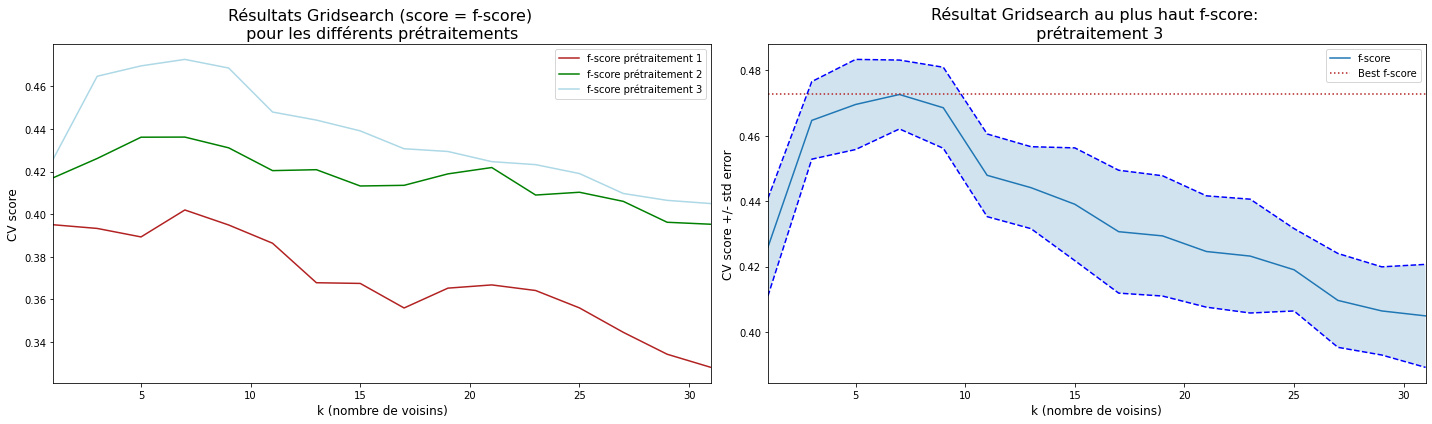

In [29]:
# initialize plot frame
k_values = np.arange(1, 32, step=2)
fig = plt.figure(figsize=(20, 6))
axes = plt.gca()

plt.subplot(1, 2, 1)
nb_folds = 5
plt.plot(k_values, scores_1, label="f-score prétraitement 1", color = "firebrick")
plt.plot(k_values, scores_2, label="f-score prétraitement 2", color = "green")
plt.plot(k_values, scores_3, label="f-score prétraitement 3", color = "lightblue")
# format plot
plt.xlabel("k (nombre de voisins)", fontsize=12)
plt.ylabel("CV score", fontsize=12)
plt.xlim([k_values[0], k_values[-1]])
plt.title("Résultats Gridsearch (score = f-score) \n pour les différents prétraitements ", fontsize = 16)
plt.legend(loc="best")



plt.subplot(1, 2, 2)

std_error_3 = scores_std_3 / np.sqrt(nb_folds)
k_values = np.arange(1, 32, step=2)

plt.plot(k_values, scores_3, label="f-score")
plt.plot(k_values, scores_3 + std_error_3, 'b--')
plt.plot(k_values, scores_3 - std_error_3, 'b--')

# control the translucency of the fill color with alpha=0.2
plt.fill_between(k_values, scores_3 + std_error_3, scores_3 - std_error_3, alpha=0.2)

# plot best score
plt.axhline(np.max(scores_3), linestyle=':', color="firebrick", label="Best f-score")

# format plot
plt.xlabel("k (nombre de voisins)", fontsize=12)
plt.ylabel("CV score +/- std error", fontsize=12)
plt.xlim([k_values[0], k_values[-1]])
plt.title("Résultat Gridsearch au plus haut f-score: \n prétraitement 3", fontsize = 16)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

#### Interprétation

+ Quel que soit le prétraitement, le meilleur hyper-paramètre, c'est-à-dire le nombre optimal de voisins, est de **7**.

+ De plus, à partir des F-scores, on peut voir que le prétraitement 3 constitue le meilleur modèle dans ce cas

### Régression logistique

#### <font style="color:#4D1AFB"> Validation croisée </font>

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# non régularisée
reg = LogisticRegression(penalty="none", tol=0.001, max_iter=10000)
print("Sans régularisation")
cv_results_1_nr = cross_validate(reg, X_train_1, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 1: {0:0.3f}".format(np.mean(cv_results_1_nr["test_score"])))
print("Standard deviation f-score (validation) pretraitement 1: {0:0.3f}".format(np.std(cv_results_1_nr["test_score"])))


cv_results_2_nr = cross_validate(reg, X_train_2, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) seul acp: {0:0.3f}".format(np.mean(cv_results_2_nr["test_score"])))
print("Standard deviation f-score (validation) seul acp: {0:0.3f}".format(np.std(cv_results_2_nr["test_score"])))

cv_results_3_nr = cross_validate(reg, X_train_3, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 3: {0:0.3f}".format(np.mean(cv_results_3_nr["test_score"])))
print("Standard deviation f-score (validation) pretraitement 3: {0:0.3f}".format(np.std(cv_results_3_nr["test_score"])))
print("\n")

Sans régularisation
Average f-score (validation) pretraitement 1: 0.500
Standard deviation f-score (validation) pretraitement 1: 0.027
Average f-score (validation) seul acp: 0.414
Standard deviation f-score (validation) seul acp: 0.040
Average f-score (validation) pretraitement 3: 0.446
Standard deviation f-score (validation) pretraitement 3: 0.027




In [32]:
# régularisée l2
reg = LogisticRegression(penalty="l2", tol=0.001, max_iter=1000)
print("Régularisation l2")
cv_results_1_l2 = cross_validate(reg, X_train_1, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 1: {0:0.3f}".format(np.mean(cv_results_1_l2["test_score"])))
print("Standard deviation f-score (validation) pretraitement 1: {0:0.3f}".format(np.std(cv_results_1_l2["test_score"])))


cv_results_2_l2 = cross_validate(reg, X_train_2, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) seul acp: {0:0.3f}".format(np.mean(cv_results_2_l2["test_score"])))
print("Standard deviation f-score (validation) seul acp: {0:0.3f}".format(np.std(cv_results_2_l2["test_score"])))

cv_results_3_l2 = cross_validate(reg, X_train_3, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 3: {0:0.3f}".format(np.mean(cv_results_3_l2["test_score"])))
print("Standard deviation f-score (validation) pretraitement 3: {0:0.3f}".format(np.std(cv_results_3_l2["test_score"])))
print("\n")

Régularisation l2
Average f-score (validation) pretraitement 1: 0.497
Standard deviation f-score (validation) pretraitement 1: 0.026
Average f-score (validation) seul acp: 0.412
Standard deviation f-score (validation) seul acp: 0.041
Average f-score (validation) pretraitement 3: 0.445
Standard deviation f-score (validation) pretraitement 3: 0.030




In [33]:
# régularisée l1
reg = LogisticRegression(penalty="l1", tol=0.001, max_iter=1000, solver = "liblinear")
print("Régularisation l1")
cv_results_1_l1 = cross_validate(reg, X_train_1, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 1: {0:0.3f}".format(np.mean(cv_results_1_l1["test_score"])))
print("Standard deviation f-score (validation) pretraitement 1: {0:0.3f}".format(np.std(cv_results_1_l1["test_score"])))


cv_results_2_l1 = cross_validate(reg, X_train_2, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) seul acp: {0:0.3f}".format(np.mean(cv_results_2_l1["test_score"])))
print("Standard deviation f-score (validation) seul acp: {0:0.3f}".format(np.std(cv_results_2_l1["test_score"])))

cv_results_3_l1 = cross_validate(reg, X_train_3, y_train, cv=5, return_train_score=True, scoring="f1")
print("Average f-score (validation) pretraitement 3: {0:0.3f}".format(np.mean(cv_results_3_l1["test_score"])))
print("Standard deviation f-score (validation) pretraitement 3: {0:0.3f}".format(np.std(cv_results_3_l1["test_score"])))
print("\n")

Régularisation l1
Average f-score (validation) pretraitement 1: 0.497
Standard deviation f-score (validation) pretraitement 1: 0.029
Average f-score (validation) seul acp: 0.412
Standard deviation f-score (validation) seul acp: 0.039
Average f-score (validation) pretraitement 3: 0.443
Standard deviation f-score (validation) pretraitement 3: 0.031




#### Commentaire
On remarque que la régression logistique non régularisée est celle qui a les meilleurs F-scores, meme si ces derniers restent assez proches de ceux obtenus avec les régularisations l1 et l2.

Toutefois, sans terme de régularisation, on risque de tomber dans du sur-apprentissage.

C'est donc pour cela que je vais sélectionner par la suite une régression logistique avec régularisation.

#### <font style="color:#4D1AFB"> Sélection de la meilleure régularisation </font>

In [39]:
grid={"penalty":["l1", "l2"], "tol":[0.001], "max_iter":[100000], "solver":["saga", "liblinear"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv = 5, refit=False, scoring = "f1")

print("prétraitement 1")
logreg_cv.fit(X_train_1, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("f-score :",logreg_cv.best_score_)

print("prétraitement 2")
logreg_cv.fit(X_train_2, y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("f-score :",logreg_cv.best_score_)

print("prétraitement 3")
logreg_cv.fit(X_train_3, y_train)
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("f-score :",logreg_cv.best_score_)

prétraitement 1
tuned hpyerparameters :(best parameters)  {'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
f-score : 0.49870683382026026
prétraitement 2
tuned hpyerparameters :(best parameters)  {'max_iter': 100000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}
f-score : 0.41479250800450973
prétraitement 3
tuned hyperparameters :(best parameters)  {'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}
f-score : 0.44531542862907836


#### Interprétation

+ Comme on pouvait l'intuiter à partir des résultats des validations croisées, les F-scores les plus élevés sont ceux obtenus avec une régression logistique avec régularisation l2
+ Le meilleur F-score est obtenu avec le prétraitement 1

### Sélection du modèle final

D'après les résultats précédents, on va devoir choisir entre:
+ l'algorithme de 7 plus proches voisins, avec le prétraitement 3
+ la régression logistique avec régularisation l2, avec le prétraitement 1

Nous allons comparer ces deux modèles en affichant leurs scores ainsi que leurs matrices de confusion.

In [35]:
# 7 plus proches voisins

neigh = neighbors.KNeighborsClassifier(n_neighbors = 7)
neigh.fit(X_train_3, y_train)
y_pred_7nn = neigh.predict(X_test_3)

print(f"F-score: {f1_score(y_pred_7nn, y_test)}")
print(f"Recall score: {recall_score(y_pred_7nn, y_test)}")
print(f"Accuracy score: {accuracy_score(y_pred_7nn, y_test)}")

F-score: 0.37748344370860926
Recall score: 0.49137931034482757
Accuracy score: 0.7908787541713015


In [40]:
# régression logistique non régularisée

reg = LogisticRegression(penalty="l2", tol=0.001, max_iter=10000, solver = "liblinear")
reg.fit(X_train_1, y_train)
y_pred_reg = reg.predict(X_test_1)
print(f"F-score: {f1_score(y_pred_reg, y_test)}")
print(f"Recall score: {recall_score(y_pred_reg, y_test)}")
print(f"Accuracy score: {accuracy_score(y_pred_reg, y_test)}")

F-score: 0.4915824915824916
Recall score: 0.6576576576576577
Accuracy score: 0.8320355951056729


In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

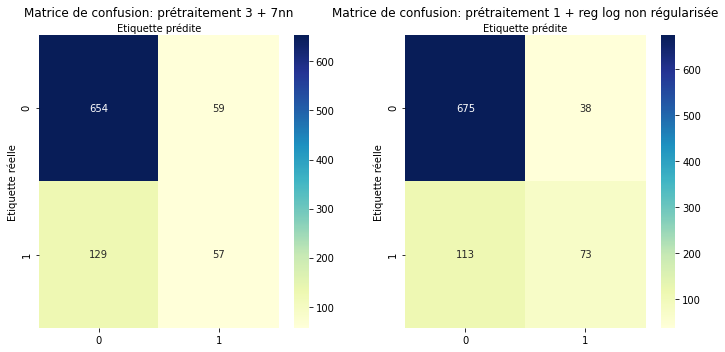

In [42]:
def make_confusion_matrix(y_test, y_pred, title):
    cnf_matrix = confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f"Matrice de confusion: {title}" , y=1.1)
    plt.ylabel('Etiquette réelle')
    plt.xlabel('Etiquette prédite')
    plt.tight_layout()



fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
make_confusion_matrix(y_test, neigh.predict(X_test_3), "prétraitement 3 + 7nn")
plt.subplot(1, 2, 2)
make_confusion_matrix(y_test, reg.predict(X_test_1), "prétraitement 1 + reg log non régularisée")

Enfin, nous allons comparer les prédictions obtenues sur le jeu de test à l'aide du **test des rangs signés de Wilcoxon**. 

Hypothèse nulle: il y a défaut de paiement (ie l'étiquette vaut 1). On utilise donc la deuxième colonne des valeurs de la fonction de décision.

In [69]:
from scipy.stats import wilcoxon

scores_7nn = neigh.predict_proba(X_test_3)[:, 1]
scores_reg = reg.predict_proba(X_test_1)[:, 1]

u = wilcoxon(scores_7nn, scores_reg, zero_method = "zsplit")
print(u)

WilcoxonResult(statistic=190842.0, pvalue=0.1420830257490633)


Le test de Wilcoxon permet de tester l'hypothèse nulle "2 échantillons non indépendants suivent la meme loi". 

La p-valeur obtenue est $ p \geq 0.1$ ce qui signifie qu'il y a peu (ou pas) de présomption contre l'hypothèse nulle, et donc que les **deux vecteurs de prédictions suivent bien la meme loi**. Ainsi, les prédictions (valeurs de la fonction de décision) obtenues sur le jeu de test ne sont **pas significativement différentes** entre les deux modèles étudiés. Toutefois, on peut toujours les "départager" en analysant leurs performances.

#### Conclusion

Les scores ainsi que les matrices de confusion (qui permet de les visualiser en partie) sont très parlants:
+ les scores de la régression logistique sont tous plus élevés que les scores des 7 plus proches voisins
+ il y a plus de vrais positifs et vrais négatifs dans la matrice de confusion de la régression logistique, ainsi que moins de faux positifs et faux négatifs

Les **prédictions de la régression logistique avec la régularisation l2 sont donc meilleures**; on choisit donc ce modèle pour la suite.

## Prédictions finales

In [48]:
# Extraction des données public et private

# public
os.chdir("/Users/sophierossi/Desktop/rossi_projet_data/csv_files")
df_public = pd.read_csv('credit_public.csv', sep='\t')
y = df_public["Defaut_de_paiement"]
y_public = y.values
columns = list(df_public.columns)
columns.pop()
X = df_public[columns]
X_public = X.values

# private
df_private = pd.read_csv('credit_private.csv', sep='\t')
X_private = X.values

In [49]:
# Prétraitement 1

# encodage one-hot sur les variables catégorielles
features = list(df_public.drop(columns=["Defaut_de_paiement"]).columns)
c_features = ["Sexe", "Education", "Statut_marital", "Statut_mois_1", "Statut_mois_2", "Statut_mois_3",
              "Statut_mois_4", "Statut_mois_5", "Statut_mois_6"]
c_features_idx = [features.index(feat_name) for feat_name in c_features]

dummy_encoder = OneHotEncoder(categories = "auto", sparse=False, handle_unknown = "ignore")

dummy_encoder.fit(X_train[:, c_features_idx])
X_public_onehot = dummy_encoder.transform(X_public[:, c_features_idx])
X_private_onehot = dummy_encoder.transform(X_private[:, c_features_idx])

# encodage yeo-johnson sur les variables quantitatives
yeo_features = ["Credit_total", "Age", "Montant_mois_1", "Montant_mois_2", "Montant_mois_3", "Montant_mois_4", 
                       "Montant_mois_5", "Montant_mois_6", "Versement_mois_1", "Versement_mois_2", "Versement_mois_3",
                       "Versement_mois_4", "Versement_mois_5", "Versement_mois_6"]
yeo_features_idx = [features.index(feat_name) for feat_name in yeo_features]
boxcox_scaler = PowerTransformer(method='yeo-johnson')
boxcox_scaler.fit(X_public[:,yeo_features_idx])

X_public_yeo = boxcox_scaler.transform(X_public[:, yeo_features_idx])
X_private_yeo = boxcox_scaler.transform(X_private[:, yeo_features_idx])

# Vecteurs prétraités
X_public_processed = np.hstack((X_public_yeo, X_public_onehot))
X_private_processed = X_public_processed = np.hstack((X_public_yeo, X_public_onehot))


In [67]:
# Entrainement sur les données publiques
reg = LogisticRegression(penalty="l2", tol=0.001, max_iter=10000, solver = "liblinear")
reg.fit(X_public_processed, y_public)

# prédiction des données privées
y_pred_binary = reg.predict(X_private_processed)
proba_private = reg.predict_proba(X_private_processed)

# proba d'affectation à la classe positive (ie il y a défaut de paiement)
y_pred_scores = np.array([proba_private[i][1] for i in range(len(proba_private))])

# Reshape 1-dimensional arrays to 2-dimensional and stack them in the same array
y_array_final = np.hstack((y_pred_binary.reshape((y_pred_binary.shape[0], 1)), y_pred_scores.reshape((y_pred_scores.shape[0], 1))))
# Save array to file
np.savetxt("rossi_predictions_finales.csv", y_array_final, fmt=("%d", "%.3f"), delimiter= "\t", header="Prediction_binaire \t Prediction_score", comments="")

## Apprentissage profond

Un réseau de neurones profond ne semble **pas particulièrement pertinent pour ce problème**, car ce modèle requiert une **quantité massives de données** afin de pouvoir correctement entrainer le réseau de neurones, avoir de bons résultats et **éviter le sur-apprentissage**. Or, les données dont disposent les banques sont souvent limitées et amenées à changer assez souvent (prise en compte de nouvelles variables, abandon d'anciennes variables etc). Ainsi, il est probable qu'un réseau de neurones ne pourrait apprendre correctement et à court terme, alors que les banques voudraient employer de tels modèles rapidement. 

De plus, on n'est a priori **pas certains que les algorithmes vont converger**, car les problèmes d'optimisation qu'ils sont amenés à résoudre ne sont pas convexes. 

Ainsi, du moment que l'on dispose d'un **algorithme d'apprentissage supervisé performant**, il ne vaut pas forcément la peine de développer de l'apprentissage profond, étant donnés les difficultés techniques qu'ils supposent. 